# PROJECT on Prediction of Approval of Consumer Personal Loans Applications using different Machine Learning Algorithms

## By Shuvam Mohapatra

In [38]:
import pandas as pd
import numpy as np
import os

In [39]:
os.chdir(r'C:\Users\Krishna\OneDrive\Desktop\Projects\Edulyt\Consumer Personal Loan')

In [40]:
dfTrain = pd.read_excel('Train Data.xlsx')
dfTest = pd.read_excel('Test Data.xlsx')

In [41]:
dfTrain.dropna(how='all', axis='columns', inplace= True)
dfTest.dropna(how='all', axis='columns', inplace= True)

In [42]:
dfTrain.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


In [43]:
dfTest.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID,Prev_ID,AGT_ID,Prop_Area
0,CPL001015,M,Y,Dollie,Scafe,dscafe0@is.gd,02 Garrison Pass,0,Grad,N,6864.0,0.0,132.0,360.0,1.0,6869736235,79-489-1539,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,Urban
1,CPL001022,M,Y,Kim,Arne,karne9@infoseek.co.jp,6568 Dwight Point,1,Grad,N,3691.2,1800.0,151.2,360.0,1.0,3383749711,75-757-9174,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2)...,Urban
2,CPL001031,M,Y,Niccolo,Ramble,nramblef@gov.uk,3504 Lukken Park,2,Grad,N,6000.0,2160.0,249.6,360.0,1.0,7247894032,42-085-4345,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Urban
3,CPL001035,M,Y,Rabbi,Haig,rhaigg@tiny.cc,1334 Florence Way,2,Grad,N,2808.0,3055.2,120.0,360.0,NaN,3240492342,10-813-9695,Mozilla/5.0 (X11; Linux i686) AppleWebKit/534....,Urban
4,CPL001051,M,N,Gracie,Winear,gwinearj@devhub.com,9800 Ridge Oak Crossing,0,Non Grad,N,3931.2,0.0,93.6,360.0,1.0,1670564037,20-195-4948,Mozilla/5.0 (Windows NT 6.0) AppleWebKit/534.2...,Urban


In [44]:
new_df=dfTrain.drop(['Loanapp_ID', 'Sex', 'Marital_Status','first_name','last_name','email','address','AGT_ID','INT_ID','Prev_ID'], axis=1)
print("median values are:")
print(new_df.median(axis = 0))
new_df['SE'].fillna( method ='ffill', inplace = True)
new_df['Dependents'].fillna( method ='ffill', inplace = True)
new_df['CPL_Amount'].fillna((new_df['CPL_Amount'].median()), inplace=True)
new_df['CPL_Term'].fillna((new_df['CPL_Term'].median()), inplace=True)
new_df['Credit_His'].fillna((new_df['Credit_His'].median()), inplace=True)
new_df['Dependents'].replace({"3+": 4}, inplace=True)

median values are:
App_Income_1    4575.0
App_Income_2    1426.2
CPL_Amount       153.6
CPL_Term         360.0
Credit_His         1.0
dtype: float64


In [45]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
new_df['Qual_var']= le.fit_transform(new_df['Qual_var']) #Grad=0,Nongrad=1
new_df['SE']= le.fit_transform(new_df['SE']) #N=0,Y=1
new_df['Prop_Area']= le.fit_transform(new_df['Prop_Area']) #urban=2,rural=0,semi urban=1
new_df['CPL_Status']= le.fit_transform(new_df['CPL_Status']) #Y=1,N=0
new_df['Net_income']=new_df['App_Income_1']+new_df['App_Income_2']
new_df.head()

,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Net_income
0,0,0,0,7018.8,0.0,153.6,360.0,1.0,2,1,7018.8
1,1,0,0,5499.6,1809.6,153.6,360.0,1.0,0,0,7309.2
2,0,0,1,3600.0,0.0,79.2,360.0,1.0,2,1,3600.0
3,0,1,0,3099.6,2829.6,144.0,360.0,1.0,2,1,5929.2
4,0,0,0,7200.0,0.0,169.2,360.0,1.0,2,1,7200.0


In [46]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(new_df[col])),columns=[col])
    return df

scaled_df = scaleColumns(new_df,['CPL_Amount','CPL_Term','Net_income'])
scaled_df.head()

,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Net_income
0,0,0,0,7018.8,0.0,0.172214,0.74359,1.0,2,1,0.055394
1,1,0,0,5499.6,1809.6,0.172214,0.74359,1.0,0,0,0.058435
2,0,0,1,3600.0,0.0,0.082489,0.74359,1.0,2,1,0.019583
3,0,1,0,3099.6,2829.6,0.160637,0.74359,1.0,2,1,0.043980
4,0,0,0,7200.0,0.0,0.191027,0.74359,1.0,2,1,0.057292


## FROM THE COORELATION MATRIX WE CAN OBSERVE THAT 'Dependents' and 'SE' dont affect 'CPL_status' much.

### So we can remove them from our training dataset.
### Here we can observe that CPL_status depends a lot on credit history from correlation matrix

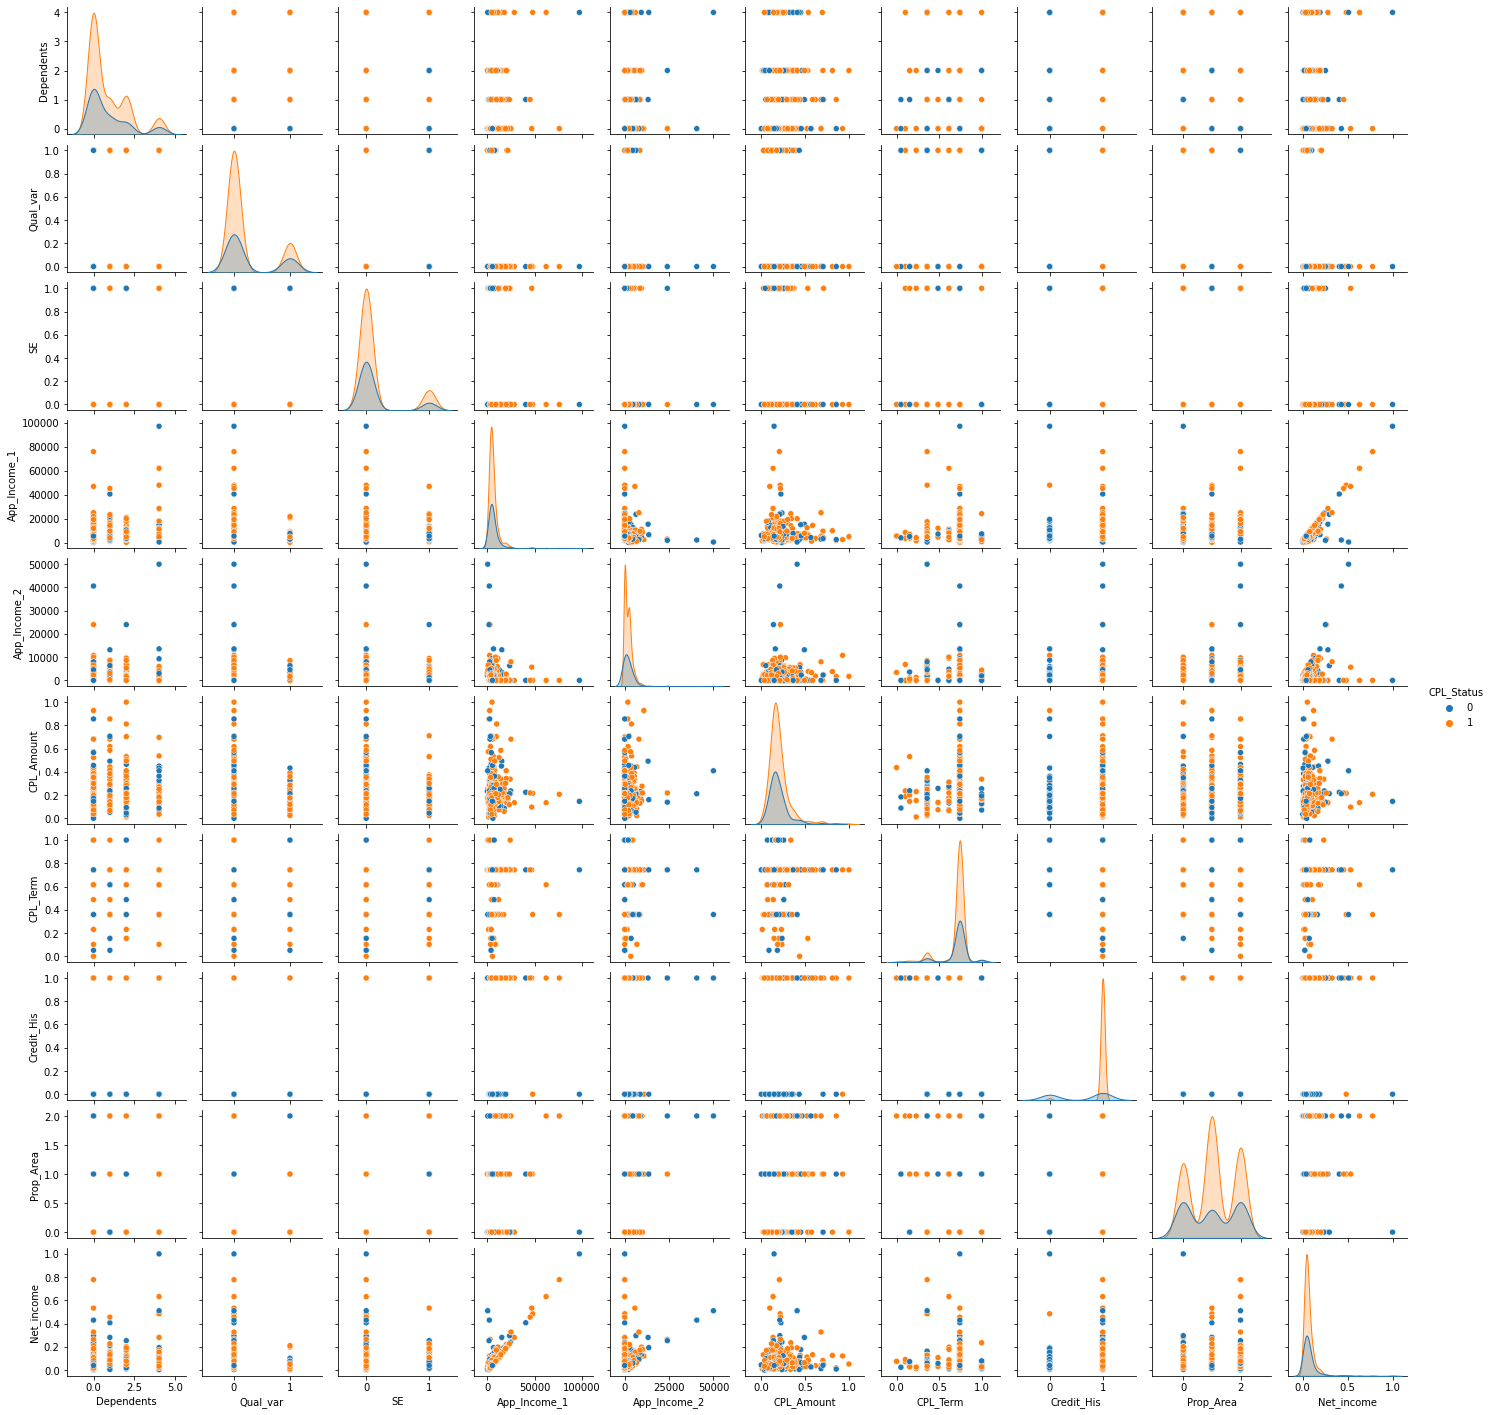

In [47]:
import seaborn as sns
sns.pairplot(scaled_df, hue='CPL_Status', diag_kind='kde', height=2)

In [48]:
from sklearn.model_selection import train_test_split
X = scaled_df[[ 'Qual_var','CPL_Amount','Net_income','CPL_Term','Credit_His','Prop_Area']]
y = scaled_df['CPL_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.20)

# 1) Test for decision tree:

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.6910569105691057

# 2) Test for SVM:

In [50]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train)
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [51]:
clf =svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False).fit(X_train,y_train)
clf.score(X_test, y_test)

0.8292682926829268

# 3) Test for KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
distances = [ 2, 3, 4, 5,6,7,8,9,10]
train_results = []
test_results = []
for p in distances:
    model = KNeighborsClassifier(p=p)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
print(train_results)
print(test_results)

[0.7337652496779571, 0.7382833219671137, 0.7412953701598848, 0.7396567401682201, 0.7428013942562703, 0.7365120860801697, 0.7395241342729408, 0.7395241342729408, 0.7395241342729408]
[0.6787878787878787, 0.6787878787878787, 0.6787878787878787, 0.6787878787878787, 0.6787878787878787, 0.6787878787878787, 0.6787878787878787, 0.6787878787878787, 0.6787878787878787]


### Here we can observe that we get best roc_auc score for n=3 ,As for better accuracy we check roc_aug in case of KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
knnreg =KNeighborsClassifier(n_neighbors =3).fit(X_train, y_train)
y_pred =knnreg.predict(X_test)
print("ROC_AUC SCORE : {}".format(roc_auc_score(y_test,y_pred)))
print("SCORE : {}".format(knnreg.score(X_test, y_test)))

ROC_AUC SCORE : 0.6676767676767676
SCORE : 0.7804878048780488


# 4) Test for Random Forest Classifier

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 0)
n_estimators = [20,40,50,60,70,80,90,100]
max_depth = [3,5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15,25]
min_samples_leaf = [1, 2, 5,7, 10,15,20] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
print(bestF.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(bestF.best_estimator_)

Fitting 3 folds for each of 1680 candidates, totalling 5040 fits
{'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 25, 'n_estimators': 20}
RandomForestClassifier(max_depth=5, min_samples_leaf=7, min_samples_split=25,
                       n_estimators=20, random_state=0)


In [55]:
RFC= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
mod= RFC.fit(X_train, y_train)
mod.score(X_test, y_test)

0.8292682926829268

# 5) Test for Logistic Regresstion

In [69]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

clf.score(X_test, y_test)

0.8292682926829268

In [70]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier' ,LogisticRegression(random_state=0) )])

param_grid = [
    {'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-10, 10, 40),
    'classifier__solver' : ['liblinear']},
    {'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-10, 10, 40),
    'classifier__solver' : ['lbfgs']}
]


clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train, y_train)
print(best_clf.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(best_clf.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'classifier__C': 0.016037187437513277, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.016037187437513277, penalty='l1',
                                    random_state=0, solver='liblinear'))])


In [81]:
clf = LogisticRegression(C=0.016037187437513277, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False).fit(X_train, y_train)

clf.score(X_test, y_test)

0.8292682926829268

# 6) Test for XGBOOST

In [60]:
import xgboost as xgb
import random
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
xgb_model.score(X_test, y_test)

[23:42:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[15 18]
 [17 73]]


c:\users\krishna\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7154471544715447

### NOW we need to predict for the TEST file

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
new_df1=dfTest.drop(['Loanapp_ID', 'Sex', 'Marital_Status','first_name','last_name','email','address','AGT_ID','INT_ID','Prev_ID'], axis=1)
new_df1['SE'].fillna( method ='ffill', inplace = True)
new_df1['Dependents'].fillna( method ='ffill', inplace = True)
new_df1['CPL_Amount'].fillna((new_df1['CPL_Amount'].median()), inplace=True)
new_df1['CPL_Term'].fillna((new_df1['CPL_Term'].median()), inplace=True)
new_df1['Credit_His'].fillna((new_df1['Credit_His'].median()), inplace=True)
  
le = LabelEncoder() 
  
new_df1['Qual_var']= le.fit_transform(new_df1['Qual_var']) #Grad=0,Nongrad=1
new_df1['Prop_Area']= le.fit_transform(new_df1['Prop_Area']) #urban=2,rural=0,semi urban=1
new_df1['Net_income']=new_df1['App_Income_1']+new_df1['App_Income_2']




scaler1 = preprocessing.MinMaxScaler()
min_max_scaler1 = preprocessing.MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler1.fit_transform(pd.DataFrame(new_df1[col])),columns=[col])
    return df

scaled_df1 = scaleColumns(new_df1,['CPL_Amount','CPL_Term','Net_income'])
scaled_df1.head()

,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,Net_income
0,0,0,N,6864.0,0.0,0.157088,0.746835,1.0,2,0.055957
1,1,0,N,3691.2,1800.0,0.187739,0.746835,1.0,2,0.039791
2,2,0,N,6000.0,2160.0,0.344828,0.746835,1.0,2,0.071218
3,2,0,N,2808.0,3055.2,0.137931,0.746835,1.0,2,0.044172
4,0,1,N,3931.2,0.0,0.095785,0.746835,1.0,2,0.021422


In [62]:
train_df=dfTrain.drop(['Loanapp_ID', 'Sex', 'Marital_Status','first_name','last_name','email','address','AGT_ID','INT_ID','Prev_ID'], axis=1)

train_df['SE'].fillna( method ='ffill', inplace = True)
train_df['Dependents'].fillna( method ='ffill', inplace = True)
train_df['CPL_Amount'].fillna((train_df['CPL_Amount'].median()), inplace=True)
train_df['CPL_Term'].fillna((train_df['CPL_Term'].median()), inplace=True)
train_df['Credit_His'].fillna((train_df['Credit_His'].median()), inplace=True)
 
 
  
train_df['Qual_var']= le.fit_transform(train_df['Qual_var']) #Grad=0,Nongrad=1
train_df['Prop_Area']= le.fit_transform(train_df['Prop_Area']) #urban=2,rural=0,semi urban=1
train_df['Net_income']=train_df['App_Income_1']+train_df['App_Income_2']


scaler2 = preprocessing.MinMaxScaler()
min_max_scaler2 = preprocessing.MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler2.fit_transform(pd.DataFrame(train_df[col])),columns=[col])
    return df

scaled_df2 = scaleColumns(train_df,['CPL_Amount','CPL_Term','Net_income'])
scaled_df2.head()

,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Net_income
0,0,0,N,7018.8,0.0,0.172214,0.74359,1.0,2,Y,0.055394
1,1,0,N,5499.6,1809.6,0.172214,0.74359,1.0,0,N,0.058435
2,0,0,Y,3600.0,0.0,0.082489,0.74359,1.0,2,Y,0.019583
3,0,1,N,3099.6,2829.6,0.160637,0.74359,1.0,2,Y,0.043980
4,0,0,N,7200.0,0.0,0.191027,0.74359,1.0,2,Y,0.057292


In [63]:
X_P4train=scaled_df2[[ 'Qual_var','CPL_Amount','Net_income','CPL_Term','Credit_His','Prop_Area']]
y_P4train= scaled_df2['CPL_Status']
X_P4test=scaled_df1[[ 'Qual_var','CPL_Amount','Net_income','CPL_Term','Credit_His','Prop_Area']]

### Since we observed best SCORE in SVM,LOGISTIC and RANDOM FOREST

### USING THOSE MODELS LETS US PREDICT CPL_Status for the test data(FROM TEST file)

In [65]:
#SVM
Svm =svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False).fit(X_P4train,y_P4train)
y_predSVM = Svm.predict(X_P4test)
dfTest['CPL_Status(SVM)']=y_predSVM

In [66]:
#RANDOM FOREST
RFC= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
mod= RFC.fit(X_P4train, y_P4train)
y_predRFC = mod.predict(X_P4test)
dfTest['CPL_Status(RFC)']=y_predRFC

In [83]:
#Logistic
log1 = LogisticRegression(C=0.016037187437513277, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False).fit(X_P4train, y_P4train)
y_predlog = log1.predict(X_P4test)
dfTest['CPL_Status(LOGISTIC)']=y_predlog